# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?id=524901&units=metric&appid=' + weather_api_key

# Define an empty list to fetch the weather data for each city
#this is storing the CITY data, long, lat, etc. 
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | muisne
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | rosetta
Processing Record 4 of Set 1 | broome
Processing Record 5 of Set 1 | bull savanna
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | faxinal
Processing Record 8 of Set 1 | castro
Processing Record 9 of Set 1 | maloyaroslavets
Processing Record 10 of Set 1 | bengkulu
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | katsuura
Processing Record 13 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 14 of Set 1 | sao filipe
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | zapolyarnyy
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | saint-philippe
Processing Record 20 of Set 1 | kavaratti
Processing Record 21 of Set 1 | borlange
City not found. Skipping...
Processing 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          545
Lat           545
Lng           545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Date          545
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,muisne,0.6000,-80.0333,24.91,90,31,1.98,EC,1675828567
1,port elizabeth,-33.9180,25.5701,19.62,90,0,3.60,ZA,1675828568
2,rosetta,31.4044,30.4164,12.40,65,100,8.40,EG,1675828568
3,broome,42.2506,-75.8330,3.90,81,100,5.14,US,1675828569
4,bull savanna,17.8868,-77.5902,21.39,82,0,3.15,JM,1675828571


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,muisne,0.6000,-80.0333,24.91,90,31,1.98,EC,1675828567
1,port elizabeth,-33.9180,25.5701,19.62,90,0,3.60,ZA,1675828568
2,rosetta,31.4044,30.4164,12.40,65,100,8.40,EG,1675828568
3,broome,42.2506,-75.8330,3.90,81,100,5.14,US,1675828569
4,bull savanna,17.8868,-77.5902,21.39,82,0,3.15,JM,1675828571


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

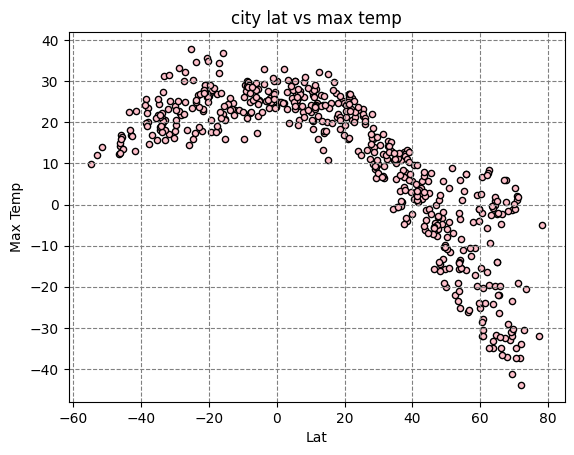

In [8]:
# Build scatter plot for (x)latitude vs. (y)temperature
city_data_df.plot.scatter(x="Lat", y="Max Temp", color="pink", edgecolors = "black")


# Incorporate the other graph properties
plt.title("city lat vs max temp")
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.grid(color="grey", linestyle="--")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

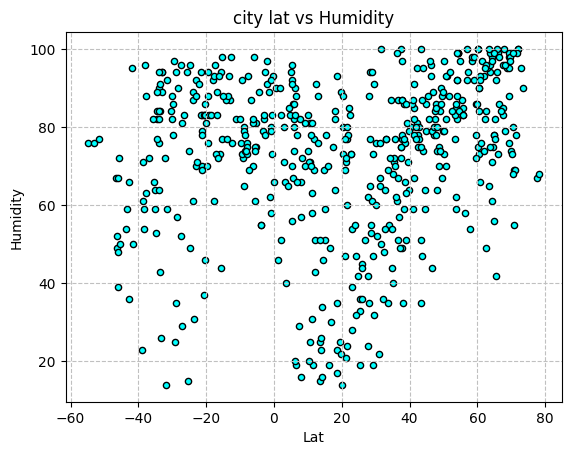

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x="Lat", y="Humidity", color="cyan", edgecolors = "black")

# Incorporate the other graph properties
plt.title("city lat vs Humidity")
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.grid(color="silver", linestyle="--")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

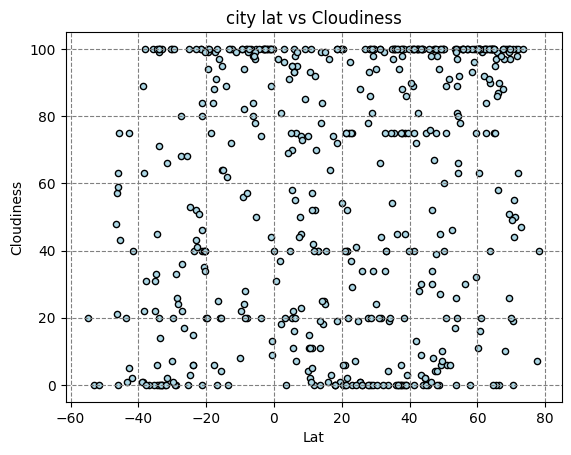

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x="Lat", y="Cloudiness", color="lightblue", edgecolors = "black")


# Incorporate the other graph properties
plt.title("city lat vs Cloudiness")
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.grid(color="grey", linestyle="--")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

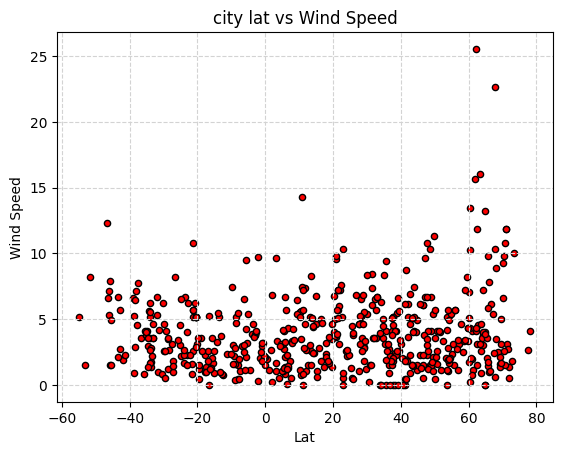

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x="Lat", y="Wind Speed", color="red", edgecolors = "black")

# Incorporate the other graph properties
plt.title("city lat vs Wind Speed")
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
plt.grid(color="lightgray", linestyle="--")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
weather_data_north = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
weather_data_north.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,muisne,0.6000,-80.0333,24.91,90,31,1.98,EC,1675828567
2,rosetta,31.4044,30.4164,12.40,65,100,8.40,EG,1675828568
3,broome,42.2506,-75.8330,3.90,81,100,5.14,US,1675828569
4,bull savanna,17.8868,-77.5902,21.39,82,0,3.15,JM,1675828571
8,maloyaroslavets,55.0146,36.4719,-11.17,97,78,2.35,RU,1675828576


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
weather_data_south = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
weather_data_south.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port elizabeth,-33.9180,25.5701,19.62,90,0,3.60,ZA,1675828568
5,rikitea,-23.1203,-134.9692,26.55,70,52,4.00,PF,1675828571
6,faxinal,-24.0003,-51.3194,17.30,61,15,1.69,BR,1675828572
7,castro,-24.7911,-50.0119,16.06,96,53,2.20,BR,1675828573
9,bengkulu,-3.8004,102.2655,29.40,55,74,3.85,ID,1675828369


###  Temperature vs. Latitude Linear Regression Plot

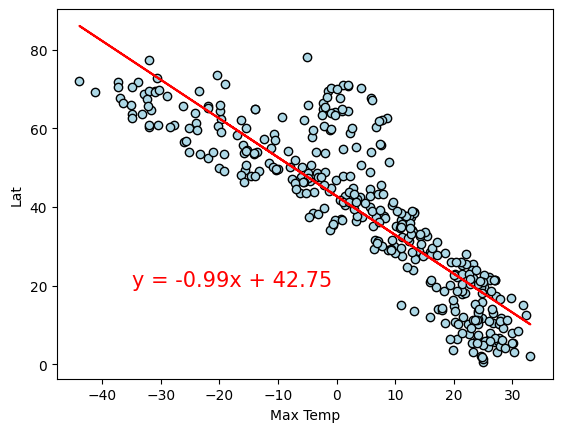

In [14]:
# Linear regression on Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = weather_data_north['Max Temp']
y_values = weather_data_north['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="lightblue", edgecolors = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,20),fontsize=15,color="red")
plt.xlabel('Max Temp')
plt.ylabel('Lat')
plt.show()

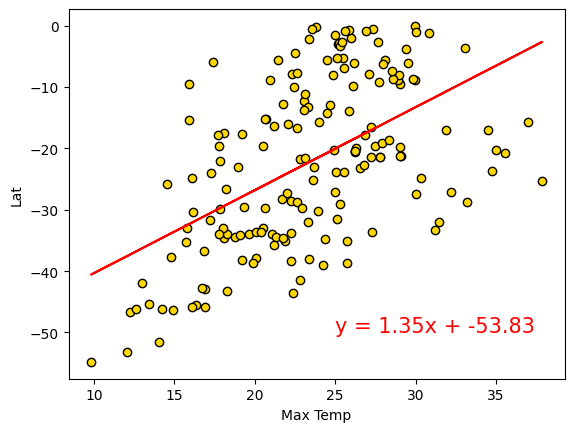

In [15]:
# Linear regression on Southern Hemisphere
x_values = weather_data_south['Max Temp']
y_values = weather_data_south['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="gold", edgecolors = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,-50),fontsize=15,color="red")
plt.xlabel('Max Temp')
plt.ylabel('Lat')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.19890208916935476


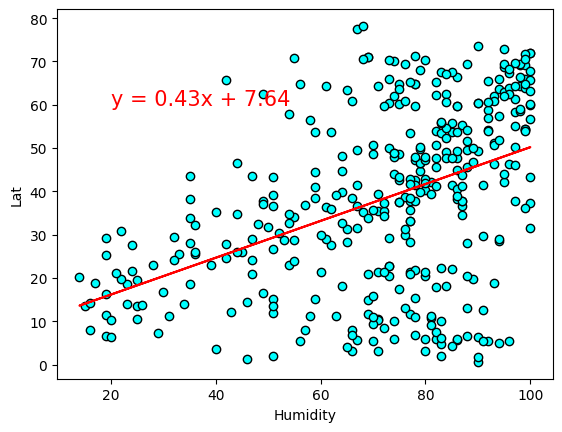

In [16]:
# Northern Hemisphere
x_values = weather_data_north['Humidity']
y_values = weather_data_north['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="cyan", edgecolors = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,60),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Lat')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.07955223505502312


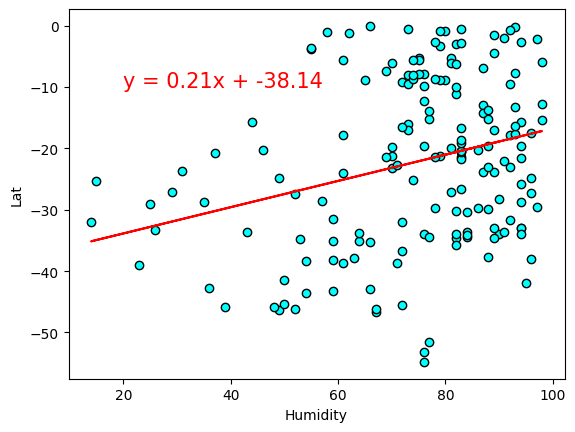

In [17]:
# Southern Hemisphere
x_values = weather_data_south['Humidity']
y_values = weather_data_south['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="cyan", edgecolors = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,-10),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Lat')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.058374227385797825


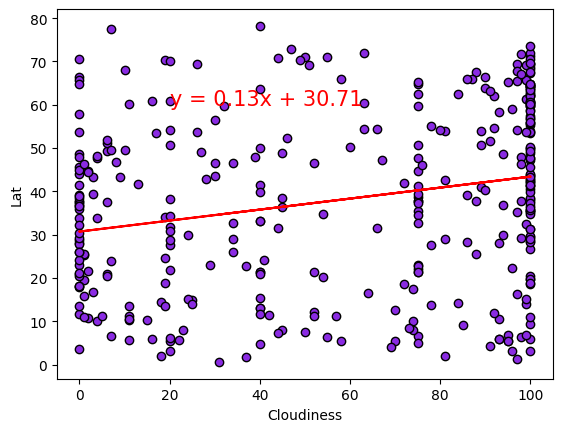

In [18]:
# Northern Hemisphere
x_values = weather_data_north['Cloudiness']
y_values = weather_data_north['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="blueviolet", edgecolors = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,60),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Lat')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.1841074789207472


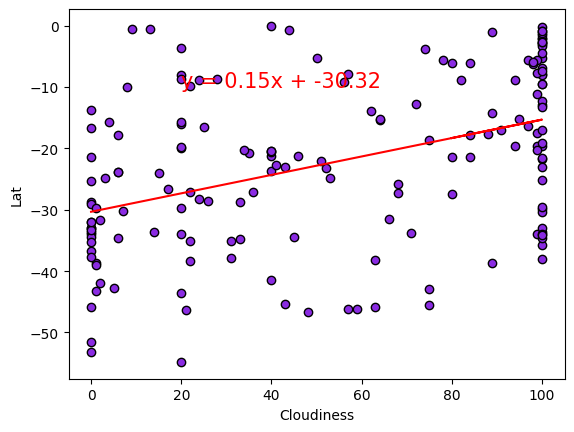

In [19]:
# Southern Hemisphere
x_values = weather_data_south['Cloudiness']
y_values = weather_data_south['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="blueviolet", edgecolors = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,-10),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Lat')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.019689110393230003


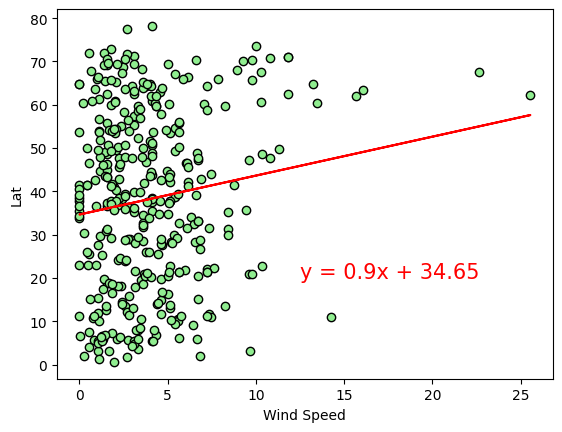

In [20]:
# Northern Hemisphere
x_values = weather_data_north['Wind Speed']
y_values = weather_data_north['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="lightgreen", edgecolors = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(12.5,20),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Lat')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.05774175756040733


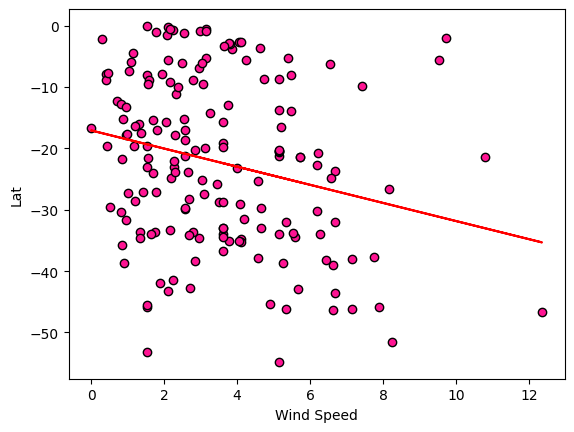

In [21]:
# Southern Hemisphere
x_values = weather_data_south['Wind Speed']
y_values = weather_data_south['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="deeppink", edgecolors = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,-10),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Lat')
print(f"The r-squared is: {rvalue**2}")
plt.show()